## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.484952  1.843623  1.131710  1.096860 -0.066073  1.301579
1 -0.244167 -0.919280  0.180495  0.951567  0.624688 -0.131254
2 -0.146999  1.617436  0.000672  0.885131 -1.362382  0.556360
3 -0.551716  1.792425  1.398378  1.012715 -1.015510  1.099266
4  1.706053 -0.883436  0.427390 -1.273279  0.892189 -0.600626


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0178341	total: 69.4ms	remaining: 1m 9s
1:	learn: 1.0066861	total: 70.2ms	remaining: 35s
2:	learn: 0.9943947	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9841126	total: 71.4ms	remaining: 17.8s
4:	learn: 0.9734416	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9635741	total: 72.5ms	remaining: 12s
6:	learn: 0.9517391	total: 73ms	remaining: 10.4s
7:	learn: 0.9428952	total: 73.5ms	remaining: 9.12s
8:	learn: 0.9334188	total: 74.1ms	remaining: 8.16s
9:	learn: 0.9231893	total: 74.7ms	remaining: 7.39s
10:	learn: 0.9127877	total: 75.1ms	remaining: 6.76s
11:	learn: 0.9029689	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8932280	total: 76.2ms	remaining: 5.79s
13:	learn: 0.8847220	total: 76.8ms	remaining: 5.41s
14:	learn: 0.8757330	total: 77.5ms	remaining: 5.09s
15:	learn: 0.8665502	total: 78ms	remaining: 4.8s
16:	learn: 0.8580984	total: 78.5ms	remaining: 4.54s
17:	learn: 0.8498483	total: 79ms	remaining: 4.31s
18:	learn: 0.8414642	total: 79.4ms	remaining: 4.1s
19:	

78:	learn: 0.4731357	total: 107ms	remaining: 1.25s
79:	learn: 0.4688062	total: 108ms	remaining: 1.24s
80:	learn: 0.4643723	total: 108ms	remaining: 1.23s
81:	learn: 0.4602832	total: 109ms	remaining: 1.22s
82:	learn: 0.4563810	total: 109ms	remaining: 1.21s
83:	learn: 0.4529961	total: 110ms	remaining: 1.2s
84:	learn: 0.4489740	total: 110ms	remaining: 1.19s
85:	learn: 0.4452016	total: 111ms	remaining: 1.18s
86:	learn: 0.4415900	total: 111ms	remaining: 1.17s
87:	learn: 0.4381557	total: 112ms	remaining: 1.16s
88:	learn: 0.4341004	total: 112ms	remaining: 1.15s
89:	learn: 0.4309807	total: 113ms	remaining: 1.14s
90:	learn: 0.4270527	total: 113ms	remaining: 1.13s
91:	learn: 0.4228195	total: 113ms	remaining: 1.12s
92:	learn: 0.4192117	total: 114ms	remaining: 1.11s
93:	learn: 0.4158864	total: 114ms	remaining: 1.1s
94:	learn: 0.4115986	total: 115ms	remaining: 1.09s
95:	learn: 0.4081038	total: 115ms	remaining: 1.09s
96:	learn: 0.4046260	total: 116ms	remaining: 1.08s
97:	learn: 0.4016064	total: 116ms

238:	learn: 0.1313287	total: 188ms	remaining: 598ms
239:	learn: 0.1306257	total: 189ms	remaining: 597ms
240:	learn: 0.1296205	total: 189ms	remaining: 596ms
241:	learn: 0.1286790	total: 190ms	remaining: 594ms
242:	learn: 0.1277345	total: 190ms	remaining: 593ms
243:	learn: 0.1268862	total: 191ms	remaining: 591ms
244:	learn: 0.1259635	total: 191ms	remaining: 590ms
245:	learn: 0.1250849	total: 192ms	remaining: 588ms
246:	learn: 0.1241267	total: 192ms	remaining: 587ms
247:	learn: 0.1231765	total: 193ms	remaining: 585ms
248:	learn: 0.1221965	total: 194ms	remaining: 584ms
249:	learn: 0.1214721	total: 194ms	remaining: 582ms
250:	learn: 0.1206230	total: 195ms	remaining: 581ms
251:	learn: 0.1197633	total: 195ms	remaining: 579ms
252:	learn: 0.1188970	total: 196ms	remaining: 578ms
253:	learn: 0.1180701	total: 196ms	remaining: 576ms
254:	learn: 0.1172943	total: 197ms	remaining: 574ms
255:	learn: 0.1165504	total: 197ms	remaining: 573ms
256:	learn: 0.1159543	total: 198ms	remaining: 571ms
257:	learn: 

443:	learn: 0.0486278	total: 292ms	remaining: 365ms
444:	learn: 0.0484670	total: 292ms	remaining: 364ms
445:	learn: 0.0482744	total: 293ms	remaining: 364ms
446:	learn: 0.0481149	total: 293ms	remaining: 363ms
447:	learn: 0.0478967	total: 294ms	remaining: 362ms
448:	learn: 0.0477068	total: 294ms	remaining: 361ms
449:	learn: 0.0474370	total: 294ms	remaining: 360ms
450:	learn: 0.0472836	total: 295ms	remaining: 359ms
451:	learn: 0.0470719	total: 295ms	remaining: 358ms
452:	learn: 0.0468641	total: 296ms	remaining: 357ms
453:	learn: 0.0466009	total: 296ms	remaining: 357ms
454:	learn: 0.0463726	total: 297ms	remaining: 356ms
455:	learn: 0.0462356	total: 297ms	remaining: 355ms
456:	learn: 0.0461006	total: 298ms	remaining: 354ms
457:	learn: 0.0459675	total: 298ms	remaining: 353ms
458:	learn: 0.0457945	total: 299ms	remaining: 352ms
459:	learn: 0.0455964	total: 299ms	remaining: 351ms
460:	learn: 0.0453801	total: 300ms	remaining: 350ms
461:	learn: 0.0452522	total: 300ms	remaining: 349ms
462:	learn: 

604:	learn: 0.0245675	total: 372ms	remaining: 243ms
605:	learn: 0.0245062	total: 372ms	remaining: 242ms
606:	learn: 0.0243601	total: 373ms	remaining: 241ms
607:	learn: 0.0242025	total: 373ms	remaining: 241ms
608:	learn: 0.0241582	total: 374ms	remaining: 240ms
609:	learn: 0.0240156	total: 374ms	remaining: 239ms
610:	learn: 0.0239318	total: 375ms	remaining: 238ms
611:	learn: 0.0237916	total: 375ms	remaining: 238ms
612:	learn: 0.0236494	total: 376ms	remaining: 237ms
613:	learn: 0.0235940	total: 376ms	remaining: 236ms
614:	learn: 0.0235654	total: 376ms	remaining: 235ms
615:	learn: 0.0234846	total: 377ms	remaining: 235ms
616:	learn: 0.0233918	total: 377ms	remaining: 234ms
617:	learn: 0.0233381	total: 378ms	remaining: 234ms
618:	learn: 0.0232024	total: 379ms	remaining: 233ms
619:	learn: 0.0230701	total: 379ms	remaining: 232ms
620:	learn: 0.0229983	total: 379ms	remaining: 231ms
621:	learn: 0.0229307	total: 380ms	remaining: 231ms
622:	learn: 0.0228793	total: 380ms	remaining: 230ms
623:	learn: 

822:	learn: 0.0108269	total: 476ms	remaining: 102ms
823:	learn: 0.0107852	total: 476ms	remaining: 102ms
824:	learn: 0.0107261	total: 477ms	remaining: 101ms
825:	learn: 0.0106681	total: 477ms	remaining: 101ms
826:	learn: 0.0106276	total: 478ms	remaining: 99.9ms
827:	learn: 0.0105679	total: 478ms	remaining: 99.3ms
828:	learn: 0.0105080	total: 479ms	remaining: 98.7ms
829:	learn: 0.0104521	total: 479ms	remaining: 98.1ms
830:	learn: 0.0103865	total: 480ms	remaining: 97.5ms
831:	learn: 0.0103476	total: 480ms	remaining: 96.9ms
832:	learn: 0.0102983	total: 481ms	remaining: 96.5ms
833:	learn: 0.0102417	total: 482ms	remaining: 95.9ms
834:	learn: 0.0101788	total: 482ms	remaining: 95.3ms
835:	learn: 0.0101159	total: 482ms	remaining: 94.6ms
836:	learn: 0.0100649	total: 483ms	remaining: 94ms
837:	learn: 0.0100100	total: 483ms	remaining: 93.4ms
838:	learn: 0.0099602	total: 484ms	remaining: 92.8ms
839:	learn: 0.0099231	total: 484ms	remaining: 92.2ms
840:	learn: 0.0098625	total: 485ms	remaining: 91.6ms

983:	learn: 0.0056162	total: 556ms	remaining: 9.05ms
984:	learn: 0.0056027	total: 557ms	remaining: 8.48ms
985:	learn: 0.0055858	total: 557ms	remaining: 7.92ms
986:	learn: 0.0055694	total: 558ms	remaining: 7.35ms
987:	learn: 0.0055416	total: 558ms	remaining: 6.78ms
988:	learn: 0.0055158	total: 559ms	remaining: 6.21ms
989:	learn: 0.0054975	total: 559ms	remaining: 5.65ms
990:	learn: 0.0054817	total: 560ms	remaining: 5.08ms
991:	learn: 0.0054566	total: 560ms	remaining: 4.52ms
992:	learn: 0.0054411	total: 561ms	remaining: 3.95ms
993:	learn: 0.0054167	total: 561ms	remaining: 3.39ms
994:	learn: 0.0054016	total: 562ms	remaining: 2.82ms
995:	learn: 0.0053867	total: 562ms	remaining: 2.26ms
996:	learn: 0.0053630	total: 563ms	remaining: 1.69ms
997:	learn: 0.0053486	total: 563ms	remaining: 1.13ms
998:	learn: 0.0053234	total: 564ms	remaining: 564us
999:	learn: 0.0053151	total: 564ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

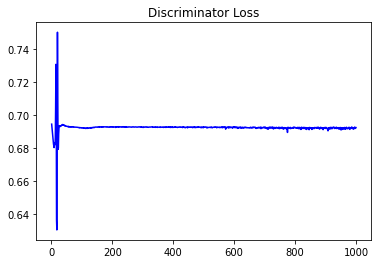

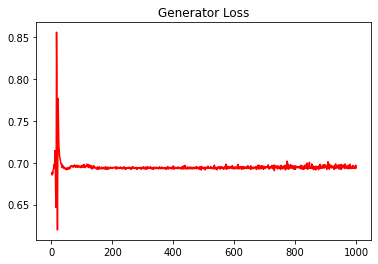

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.107570907616925


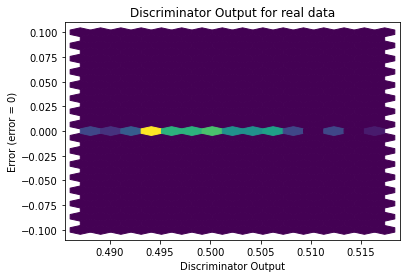

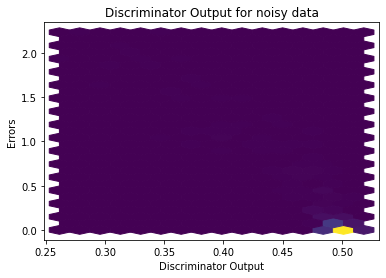

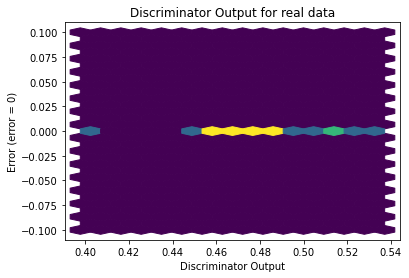

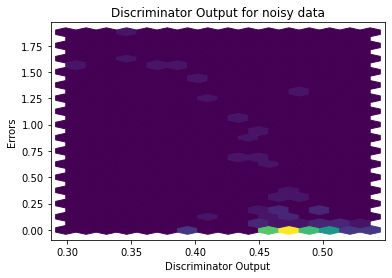

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


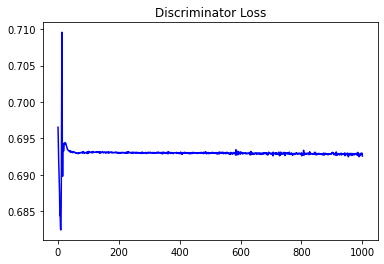

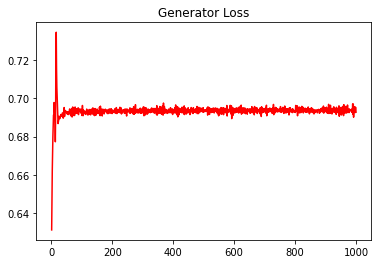

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06851595738807362


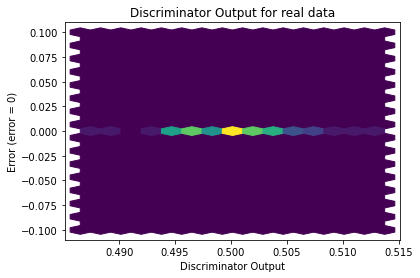

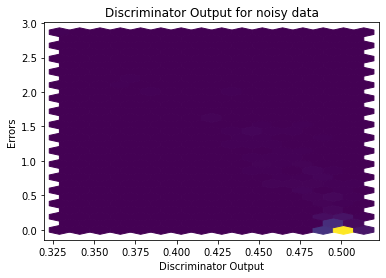

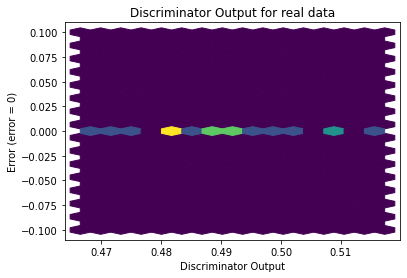

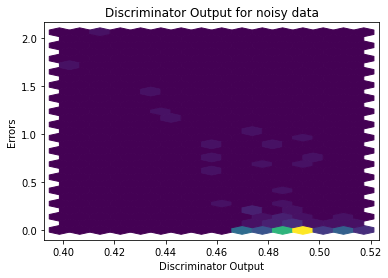

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6636]], requires_grad=True)
